In [18]:
import gym
import numpy as np

from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt

from mlp import *
from feedback_env import *
from learning import *

In [19]:
# Setup configs for reward and policy learning

reward_cfg = {
    'n_sample': 100,
    'n_epoch': 10,
    'lr': 0.9,
    'verbose': False,
    'print_freq': 500,
    'batch_size': 64
}

policy_cfg = {
    'timesteps': 100,
    'verbose': True,
    'algo': 'ppo' # not used atm
}

In [20]:
## Feedback loop

iterations = 10
samples = {}

# Create comparison function
f = lambda x: 0
g = lambda x: 0
comparison_fn = create_comparison_fn(f, g, sigma_f=0, sigma_g=0)

# Initialize random sampler
sample = lambda n: (None, [np.random.uniform(-10, 10, size=(2,)) for _ in range(n)])

for i in range(iterations):
    print("Iteration", i)
    # Learn reward function from samples and feedback from comparison function
    reward_fn = learn_reward(sample, comparison_fn, reward_cfg=reward_cfg)
    
    # Train policy on reward function and return sampler
    sample = train_policy(reward_fn, policy_cfg=policy_cfg)

    # Store samplers
    samples[i] = sample

Iteration 0
Learning with PPO
Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | -0.0226  |
| time/              |          |
|    fps             | 2053     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
Iteration 1


/Users/anandsranjan/miniconda3/envs/games_env/lib/python3.9/site-packages/gym/envs/registration.py:216: UserWarning: WARN: Overriding environment FeedbackEnv-v0
  logger.warn("Overriding environment {}".format(id))


Learning with PPO
Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | -0.389   |
| time/              |          |
|    fps             | 2085     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
Iteration 2


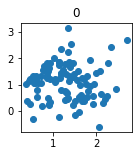

[1.291707  1.0975428] [0.5240993 0.6819313]


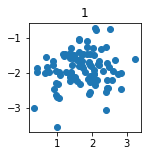

[ 1.7136568 -1.889941 ] [0.58904123 0.47593126]


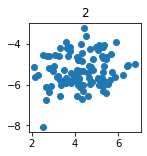

[ 4.304725  -5.3086705] [1.0352997 0.8074081]


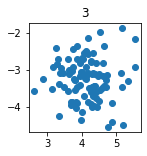

[ 4.1292644 -3.233093 ] [0.5469879  0.55600905]


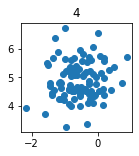

[-0.58613944  4.9121003 ] [0.5377627 0.6381621]


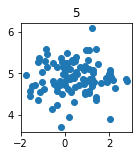

[0.408497  4.9056873] [1.0186524 0.3797343]


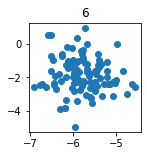

[-5.7938952 -1.8310586] [0.48038182 1.0429003 ]


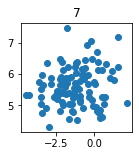

[-1.2020772  5.6103888] [1.3632684 0.6141393]


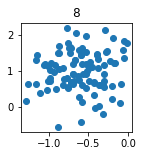

[-0.60728437  1.0014008 ] [0.2967825  0.54853094]


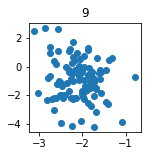

[-2.105294   -0.90048003] [0.42539528 1.4284184 ]


In [ ]:
for i in range(iterations):
    plot_sampler(samples[i], title=str(i))